Data Science project - Loan Predicton

##Understanding the Dataset##

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised clasication task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


# Importing Datasets

In [2]:
df = pd.read_csv("train.csv") 
tf = pd.read_csv("test.csv") 

# Understanding the data

In [3]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable


# Displaying top 10 rows of the Dataset

In [4]:
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
tf.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# Displaying last 10 rows of dataset

In [6]:
df.tail(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
tf.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360.0,1.0,Urban
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0,76.0,360.0,NaN,Rural
359,LP002962,Male,No,0,Graduate,No,4000,2667,152.0,360.0,1.0,Semiurban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360.0,NaN,Urban
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [8]:
#Statistics for numerical Attributes
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
tf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
df.describe(include='all').T 
#The describe() method returns description of the data in the DataFrame.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001370,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [11]:
tf.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP002610,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367,NaN,NaN,NaN,4805.6,4910.69,0,2864,3786,5060,72529
CoapplicantIncome,367,NaN,NaN,NaN,1569.58,2334.23,0,0,1025,2430.5,24000
LoanAmount,362,NaN,NaN,NaN,136.133,61.3667,28,100.25,125,158,550
Loan_Amount_Term,361,NaN,NaN,NaN,342.537,65.1566,6,360,360,360,480


In [12]:
df.info()
#we can change objects into categorical and to cooresponding data to save some memory 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [14]:
df.shape 
#shape attribute in Pandas enables us to obtain the shape of a DataFrame.

(614, 13)

In [15]:
tf.shape 

(367, 12)

In [16]:
print("Number of row",df.shape[0])
print("Number of column",df.shape[1])

Number of row 614
Number of column 13


In [17]:
print("Number of row",tf.shape[0])
print("Number of column",tf.shape[1])

Number of row 367
Number of column 12


# Preprocessing the Dataset

In [18]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
tf.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
#filling the missing values into Numerical Terms by using mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
#filling the null values by mean value

In [21]:
tf['LoanAmount'] = tf['LoanAmount'].fillna(tf['LoanAmount'].mean())
tf['Loan_Amount_Term'] = tf['Loan_Amount_Term'].fillna(tf['Loan_Amount_Term'].mean())
tf['Credit_History'] = tf['Credit_History'].fillna(tf['Credit_History'].mean())

In [22]:
#filling the missing values into categorical Terms by using mode operation
#filling the missing values by most occuring term
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
#'0' is for retriving only value

In [23]:
tf['Gender'] = tf["Gender"].fillna(tf['Gender'].mode()[0])
tf['Married'] = tf["Married"].fillna(tf['Married'].mode()[0])
tf['Dependents'] = tf["Dependents"].fillna(tf['Dependents'].mode()[0])
tf['Self_Employed'] = tf["Self_Employed"].fillna(tf['Self_Employed'].mode()[0])

In [24]:
df.isnull().sum() #all the null values are replaced

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
tf.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data analysis

analyzing the data for each categorical attribute 

### categorical attribute visulization

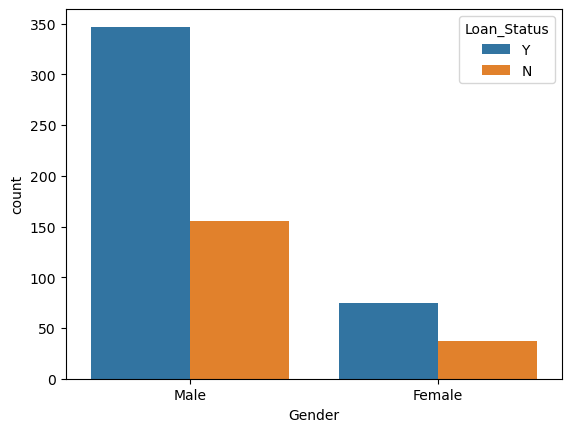

In [26]:
sns.countplot(data=df["Loan_Status"], x=df["Gender"], hue=df["Loan_Status"]);

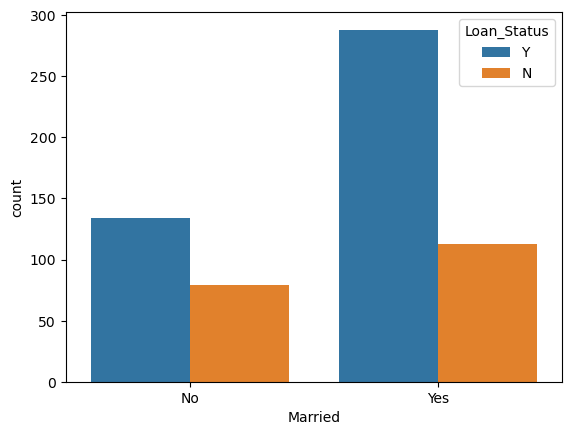

In [27]:
sns.countplot(data=df["Loan_Status"], x=df["Married"], hue=df["Loan_Status"]);

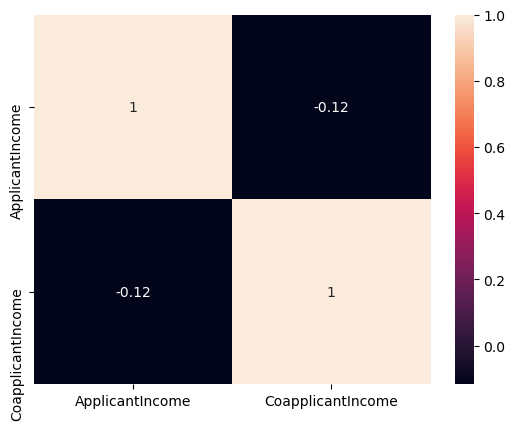

In [28]:
sns.heatmap(df[['ApplicantIncome','CoapplicantIncome']].corr(), annot=True);

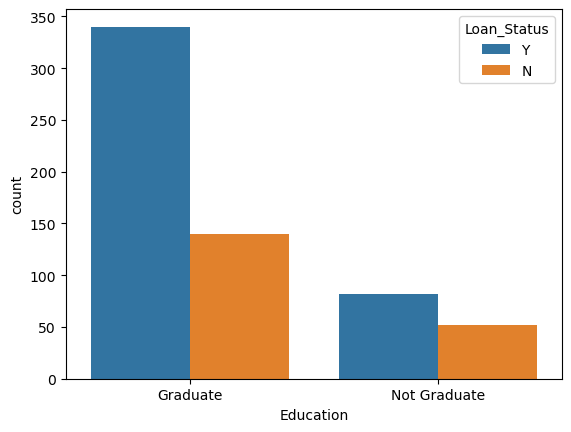

In [29]:
sns.countplot(data=df["Loan_Status"], x=df["Education"], hue=df["Loan_Status"]);

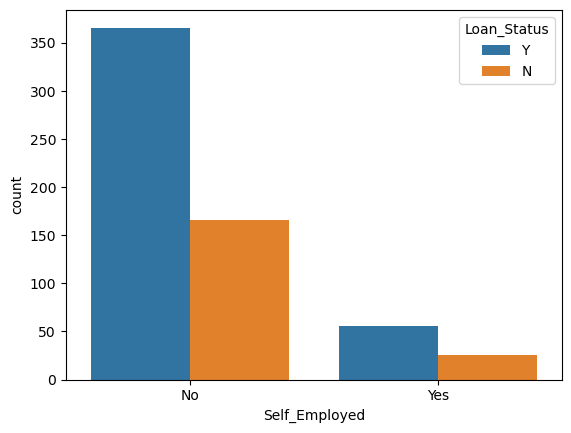

In [30]:
sns.countplot(data=df["Loan_Status"], x=df["Self_Employed"], hue=df["Loan_Status"]);

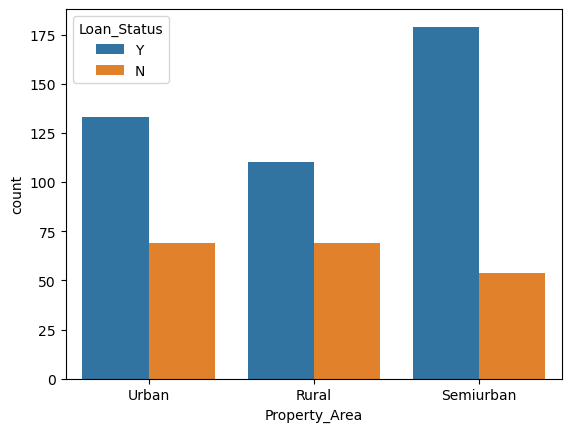

In [31]:
sns.countplot(data=df["Loan_Status"], x=df["Property_Area"], hue=df["Loan_Status"]);

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

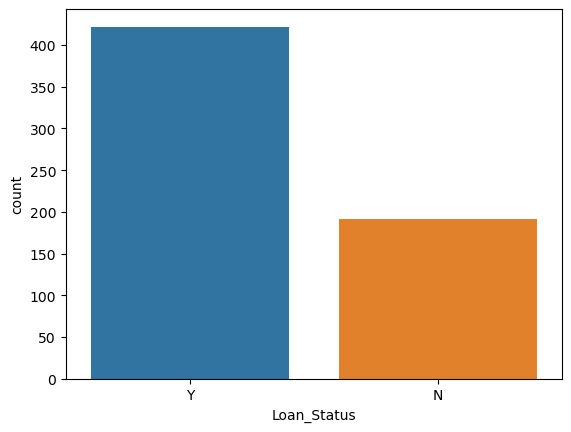

In [32]:
sns.countplot(df['Loan_Status'])

In [33]:
#numercial attribues visualization
#apply log transformation to the attributes
#use log function to normalize attributes
#mean is in middle

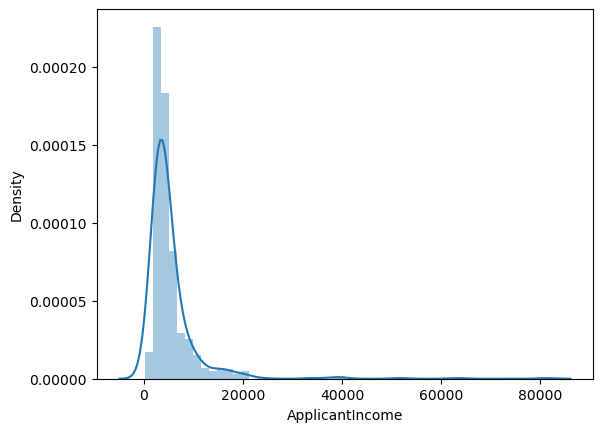

In [34]:
sns.distplot(df["ApplicantIncome"]);

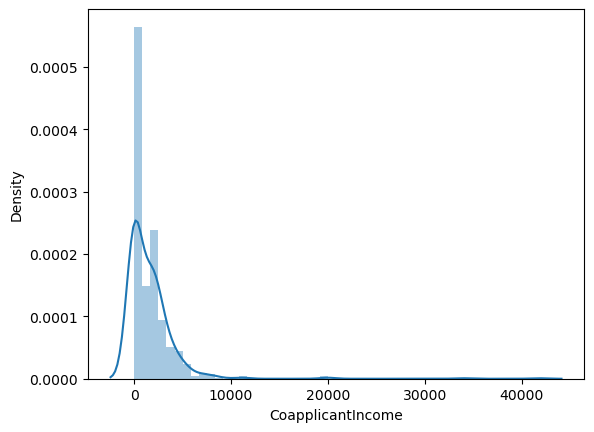

In [35]:
sns.distplot(df["CoapplicantIncome"]);

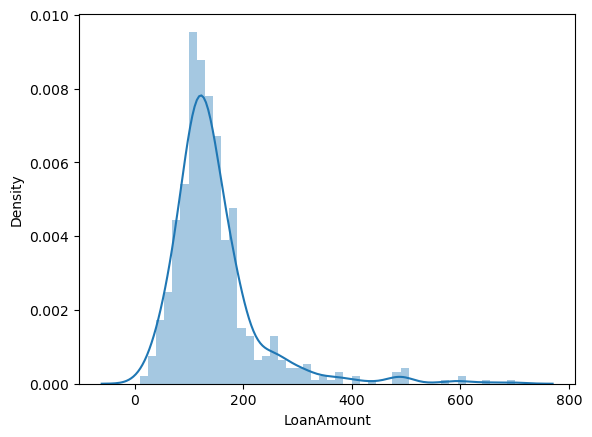

In [36]:
sns.distplot(df["LoanAmount"]);

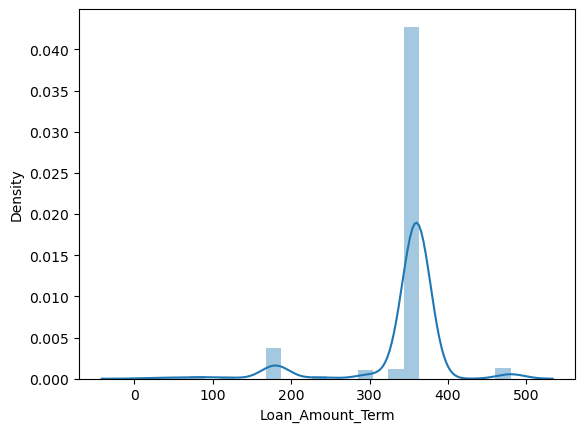

In [37]:
sns.distplot(df['Loan_Amount_Term']);

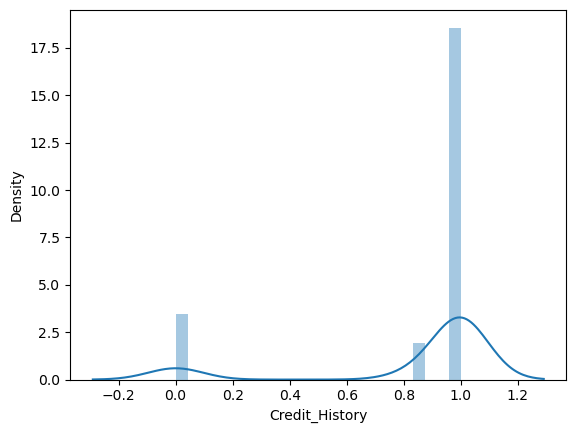

In [38]:
sns.distplot(df['Credit_History']);

# Creation of new Attributes

In [39]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [40]:
tf['Total_Income'] = tf['ApplicantIncome'] + tf['CoapplicantIncome']
tf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


# Log Transformation

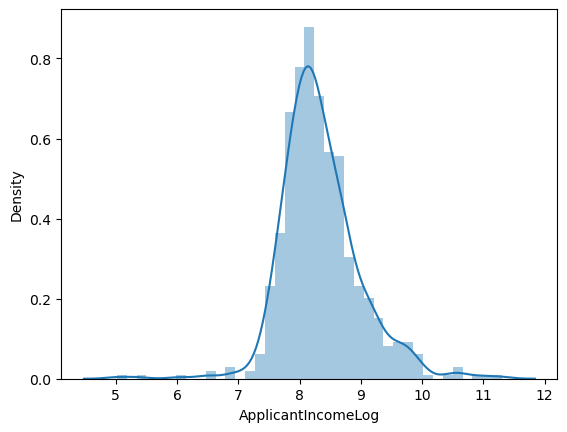

In [41]:
# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"]);

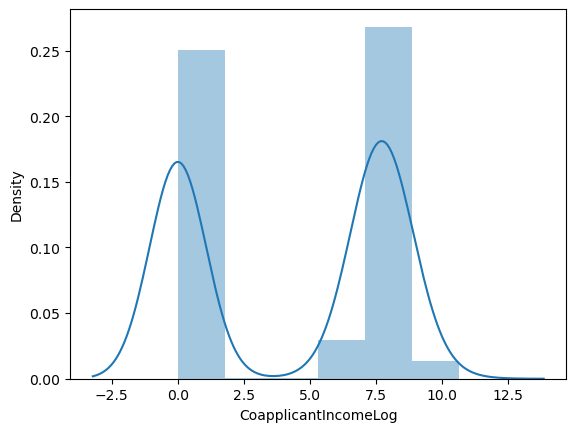

In [42]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"]);

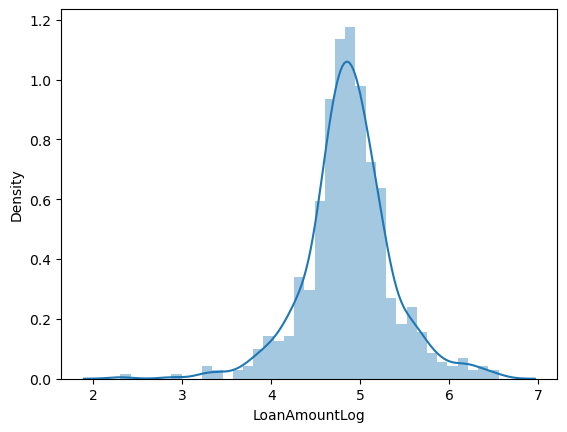

In [43]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"]);

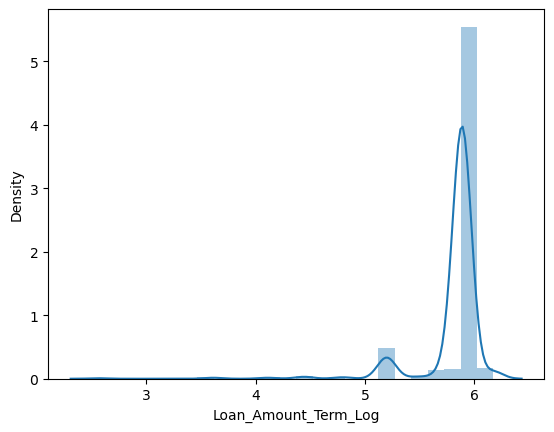

In [44]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"]);

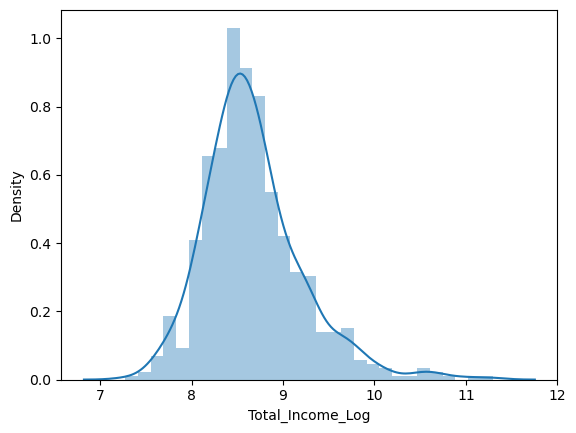

In [45]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"]);

In [46]:
#Log Transformation for test data set
tf['ApplicantIncomeLog'] = np.log(tf['ApplicantIncome']+1)
tf['CoapplicantIncomeLog'] = np.log(tf['CoapplicantIncome']+1)
tf['LoanAmountLog'] = np.log(tf['LoanAmount']+1)
tf['Loan_Amount_Term_Log'] = np.log(tf['Loan_Amount_Term']+1)
tf['Total_Income_Log'] = np.log(tf['Total_Income']+1)

# Coorelation Matrix

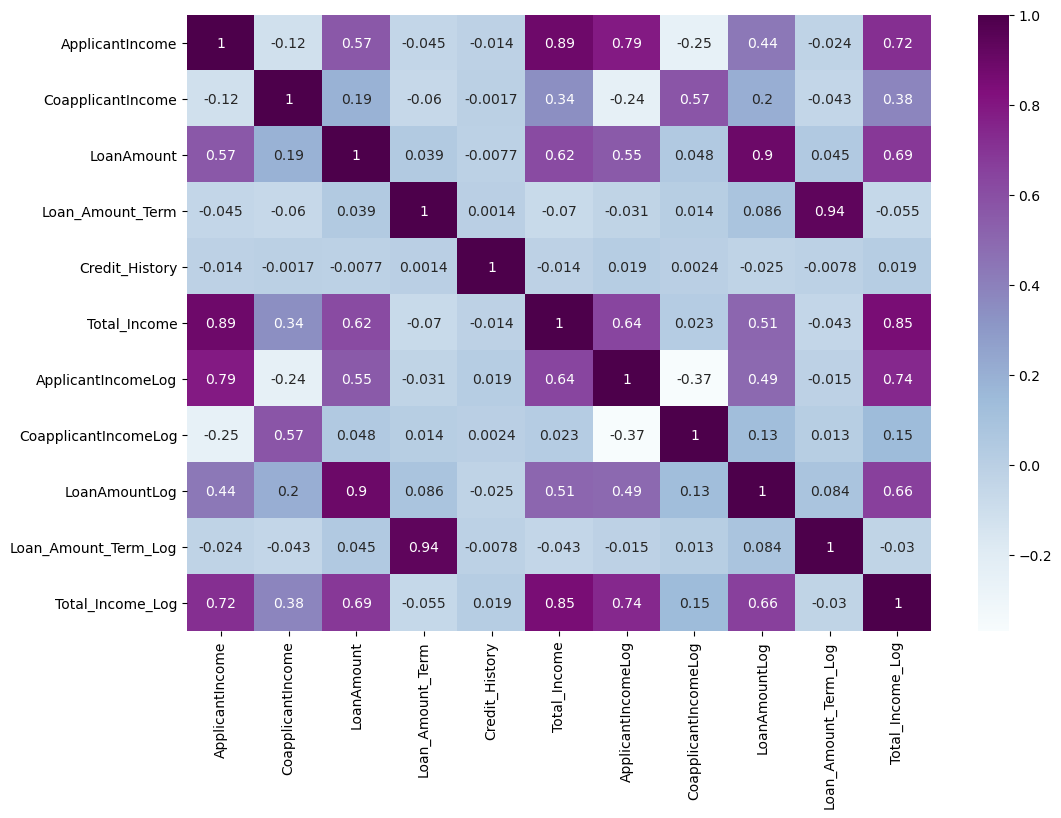

In [47]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap="BuPu");

In [48]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [49]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
tf = tf.drop(columns=cols, axis=1)
tf.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.000000,Urban,8.651899,4.709530,5.888878,8.651899
1,Male,Yes,1,Graduate,No,1.000000,Urban,8.031710,4.844187,5.888878,8.428799
2,Male,Yes,2,Graduate,No,1.000000,Urban,8.517393,5.342334,5.888878,8.824825
3,Male,Yes,2,Graduate,No,0.825444,Urban,7.758333,4.615121,5.888878,8.494334
4,Male,No,0,Not Graduate,No,1.000000,Urban,8.094684,4.369448,5.888878,8.094684


In [50]:
df.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Credit_History          0
Property_Area           0
Loan_Status             0
ApplicantIncomeLog      0
LoanAmountLog           0
Loan_Amount_Term_Log    0
Total_Income_Log        0
dtype: int64

In [51]:
tf.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
Credit_History          0
Property_Area           0
ApplicantIncomeLog      0
LoanAmountLog           0
Loan_Amount_Term_Log    0
Total_Income_Log        0
dtype: int64

# Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [53]:
c = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in c:
    tf[col] = le.fit_transform(tf[col])

In [54]:
tf

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.651899,4.709530,5.888878,8.651899
1,1,1,1,0,0,1.000000,2,8.031710,4.844187,5.888878,8.428799
2,1,1,2,0,0,1.000000,2,8.517393,5.342334,5.888878,8.824825
3,1,1,2,0,0,0.825444,2,7.758333,4.615121,5.888878,8.494334
4,1,0,0,1,0,1.000000,2,8.094684,4.369448,5.888878,8.094684
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,1.000000,2,8.296547,4.736198,5.888878,8.663369
363,1,1,0,0,0,1.000000,2,8.333030,4.753590,5.888878,8.490438
364,1,0,0,0,0,0.825444,1,8.086718,4.844187,5.888878,8.564840
365,1,1,0,0,0,1.000000,0,8.517393,5.068904,5.888878,8.908424


In [55]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
5,1,1,2,0,1,1.0,2,1,8.597482,5.590987,5.888878,9.170976
6,1,1,0,1,0,1.0,2,1,7.755339,4.564348,5.888878,8.255828
7,1,1,3,0,0,0.0,1,0,8.018625,5.068904,5.888878,8.619930
8,1,1,2,0,0,1.0,2,1,8.295798,5.129899,5.888878,8.618485
9,1,1,1,0,0,1.0,1,0,9.460476,5.857933,5.888878,10.077861


# Train-Test Split

In [56]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [58]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1 #split data set in multiple paths 
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100) 

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
classify(dtc_model, X, y)

Accuracy is 71.42857142857143
Cross validation is 70.85299213647875


In [60]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
rfc_model = RandomForestClassifier()
classify(rfc_model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.66719978675197


In [61]:
etc_model = ExtraTreesClassifier()
classify(etc_model, X, y)

Accuracy is 74.02597402597402
Cross validation is 77.6915900306544


# Hyperparameter tuning

In [62]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 79.97067839530855


# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [63]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[26, 28],
       [ 4, 96]], dtype=int64)

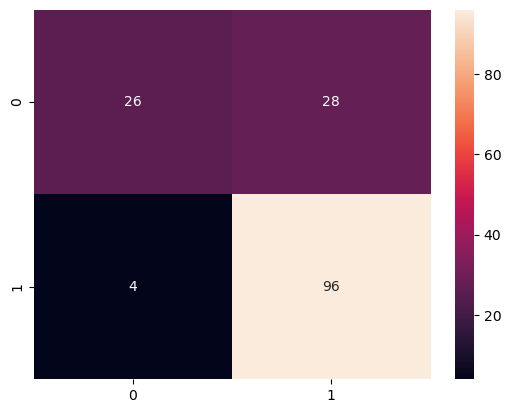

In [65]:
sns.heatmap(cm, annot=True);

# Save The Model

In [66]:
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [67]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)


In [68]:
rf.fit(X,y)


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=270)

In [69]:
import joblib

In [70]:
joblib.dump(rf,'loan_status_predict.joblib')

['loan_status_predict.joblib']

In [71]:
model = joblib.load('loan_status_predict.joblib')

In [72]:
df = pd.DataFrame({
    'Gender':0,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':1,
    'ApplicantIncome':0,
    'CoapplicantIncome':0,
    'LoanAmount':450,
    'Loan_Amount_Term':0,
    'Credit_History':0,
    'Property_Area':0
},index=[0])

In [73]:
result = model.predict(df)

In [74]:
if result >=1  :
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# Passing the model into testing file

In [75]:
import pandas as pd
tf.to_csv('test1.csv',index=False)

In [76]:
new_data = pd.read_csv('tf.csv')
predictions = model.predict(new_data)
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [77]:
array = [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
a = len(array)
print(a)

367


In [78]:
print("No. of Loan Approved Applicant's is",array.count(1))

No. of Loan Approved Applicant's is 307


In [79]:
print("No. of Loan Not Approved Applicant's is",array.count(0))

No. of Loan Not Approved Applicant's is 60


In [80]:
for i in array:
    if i == 1:
        print("Loan Approved")
    else:
        print("Loan Not Approved")

Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Approved
Loan Approved
Loan Not Approved
Loan Not Approved
Loan Approve

# Conclusion

To pass the new testing dataset into trained model, save the model with best accurate classifier,then all attributes in new dataset as like trained attributes,equal no. of columns and same datatype.
then i converted dataframe into csv file ,finally i predicted 'is the application is eligible for loan or not'.